In [1]:
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

### lvl 1 setups

import sys
sys.path.append('/portal1/dell/GitHub/WAYS')
sys.path.append('/portal1/dell/GitHub/sanctuary')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from stats import cr
from gistool import basemap, stack_image, stack_shp, stack_hatch, stack_shp_cn, ncslice
from spatial import upscale
import statsmodels.formula.api as smf
from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau
import cartopy.crs as ccrs

In [3]:
### matplotlib setups
## set the line width of the hatch
mpl.rcParams['hatch.linewidth'] = 0.5

In [13]:
ds_daily=xr.open_dataset('1959_2021_prec_daily_mm.nc')
ds_19 = ds_daily.sel(time = ds_daily.time[21915:22280])

In [42]:
#remove 29/2 
ds_remove=ds_daily.sel(time=~((ds_daily.time.dt.month == 2) & (ds_daily.time.dt.day == 29)))

arr=ds_remove.tp.values
arr.shape
#calculate 1981-2010 mean perc
arr=ds_remove.tp.values
arr.shape
#reshape to each day 
arr_all=arr.reshape(63,365,141,81)
#average
arr_mean=np.nanmean(arr_all,axis=0)

arr_mean.shape
# compose a dataset to store mean perc in 1981-2010
ds_daily_mean = xr.Dataset({'tp': (['time', 'lat', 'lon'], arr_mean)},
                    coords={'lon': (['lon'], ds_remove.lon),
                            'lat': (['lat'], ds_remove.lat),
                            'time': ('time', ds_19.time)})

In [84]:
#ds_19 = ds_remove.sel(time=ds_remove.time[21900:22265])
#ds_19
######################## you can choose time here if you want
######################## following has 6 figure :
######################## top 3: whole year anom, and last 3: May-Oct anom.
ds_19 = ds_remove.sel(time=ds_remove.time[21900:22265])
ds_8110 = ds_remove.sel(time=ds_remove.time[8030:18980])
ds_19

<xarray.Dataset>
Dimensions:  (lat: 141, lon: 81, time: 365)
Coordinates:
  * lon      (lon) float32 90.0 90.25 90.5 90.75 ... 109.2 109.5 109.8 110.0
  * lat      (lat) float32 35.0 34.75 34.5 34.25 34.0 ... 1.0 0.75 0.5 0.25 0.0
  * time     (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-31
Data variables:
    tp       (time, lat, lon) float32 0.01224 0.01891 0.02892 ... 18.19 24.41

In [85]:
arr=ds_8110.tp.values
arr.shape
#reshape to each day 
arr_all=arr.reshape(30,365,141,81)
#average
arr_mean=np.nanmean(arr_all,axis=0)

arr_mean.shape

(365, 141, 81)

In [86]:
ds_daily_mean = xr.Dataset({'tp': (['time', 'lat', 'lon'], arr_mean)},
                    coords={'lon': (['lon'], ds_remove.lon),
                            'lat': (['lat'], ds_remove.lat),
                            'time': ('time', ds_19.time)})

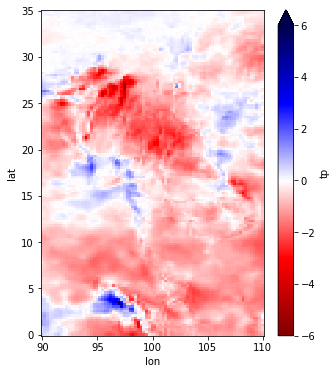

In [87]:
ds_19_ano = ds_19 - ds_daily_mean
ds_19_ano.tp.mean('time').plot(cmap='seismic_r',vmax=6,vmin=-6)
plt.rcParams["figure.figsize"] = (5,6)

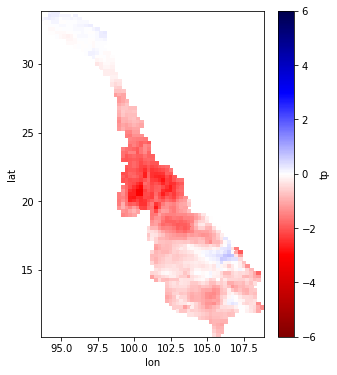

In [88]:
#LMRB shapefile path
file_shp = '/portal3/gis/Mekong_Delta/LANCANG_MEKONG.shp'
#slice shpfile and save as ds_bw_mk
ds_bw_mk,_ = ncslice(ds_19_ano,file_shp,0, index='ID')
ds_bw_mk.mean(dim='time').tp.plot(cmap='seismic_r',vmax=6,vmin=-6)
plt.rcParams["figure.figsize"] = (5,6)

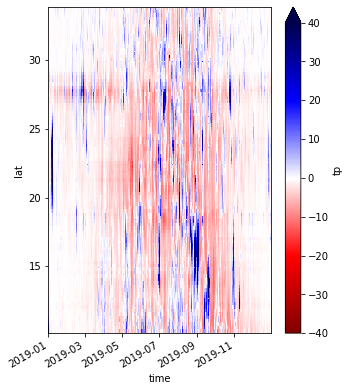

In [89]:
ds_bw_mk.mean('lon').tp.transpose().plot(cmap='seismic_r',vmax=40,vmin=-40)
plt.rcParams["figure.figsize"] = (20,3)

In [90]:
ds_19_ano_510=ds_19_ano.sel(time=ds_19_ano.time[120:304])
ds_bw_mk_510=ds_bw_mk.sel(time=ds_bw_mk.time[120:304])
ds_19_ano_510
ds_bw_mk_510

<xarray.Dataset>
Dimensions:  (lat: 95, lon: 61, time: 184)
Coordinates:
  * lon      (lon) float32 93.75 94.0 94.25 94.5 ... 108.0 108.2 108.5 108.8
  * lat      (lat) float32 33.75 33.5 33.25 33.0 32.75 ... 11.0 10.75 10.5 10.25
  * time     (time) datetime64[ns] 2019-05-01 2019-05-02 ... 2019-10-31
Data variables:
    tp       (time, lat, lon) float32 nan nan -1.021 -0.9742 ... nan nan nan nan

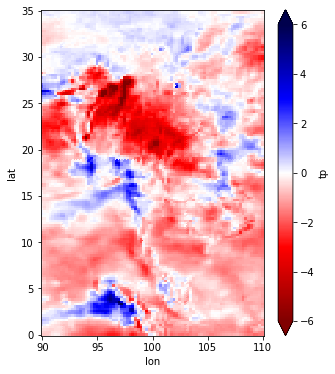

In [95]:
ds_19_ano_510.tp.mean('time').plot(cmap='seismic_r',vmax=6,vmin=-6)
plt.rcParams["figure.figsize"] = (5,6)

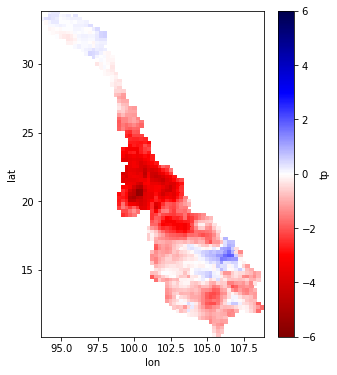

In [96]:
ds_bw_mk_510.mean(dim='time').tp.plot(cmap='seismic_r',vmax=6,vmin=-6)
# plot size
plt.rcParams["figure.figsize"] = (5,6)

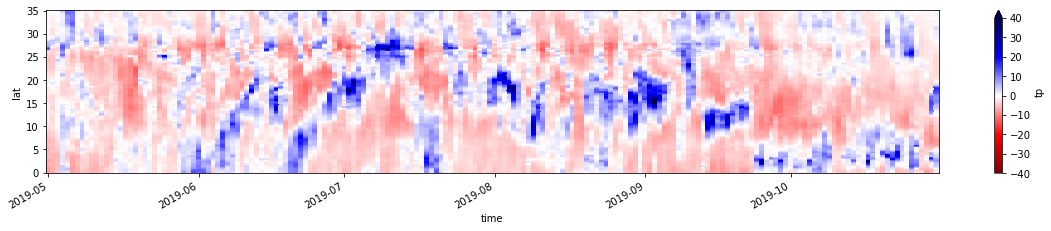

In [98]:
ds_19_ano_510.mean('lon').tp.transpose().plot(cmap='seismic_r',vmax=40,vmin=-40)
plt.rcParams["figure.figsize"] = (20,3)